In [1]:
%matplotlib inline
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
def get_SNR(file):
    with open(file, "rt")as f:
        a = f.readlines()
    lst = []
    for x in a:
        if "Value:" in x:
            lst.append(float(x.split("Value: ")[1]))
        #print(x.split("bla"))
    lst = lst[len(lst)//2 : ]
    return (np.array(lst).mean(), np.array(lst).std())

In [3]:
def get_BER(file):
    with open(file, "rb")as f:
        _ = f.read()
    
    rcv = np.frombuffer(_, dtype = np.uint8)
    aux = np.unpackbits(rcv)
    
    tx = np.array([0, 255, 40, 250, 37, 42, 186], dtype = np.uint8)
    
    pos = np.argmax(np.correlate(np.unpackbits(rcv), np.unpackbits(tx)))
    rcv = np.packbits(np.roll(np.unpackbits(rcv), -pos))
    tx_extended = np.tile(tx, int(rcv.shape[0]/len(tx)))
    
    return (1 - np.mean(np.equal(np.unpackbits(rcv), np.unpackbits(tx_extended))))

In [13]:
get_SNR("output.txt"), get_BER("output.data")

((7.516995428571428, 0.25338429086319647), 0.0007219642857142494)

## <font color = red> Quanto mais baixo o SNR, maior a chance de ocorrer problemas na recepção, mais chance do resultado obtido ser ruim
    
# <font color = blue> Resultados obtidos simulados
  <font color = blue> SNR Média, SNR STD, BER

      
((8.826337619047617, 0.21273435929088308), 9.071428571427731e-05)

((6.8066040476190475, 0.28506995506583255), 0.0017678571428570988)
      
((5.646766904761905, 0.3240655694931131), 0.006025714285714301)
      
((4.895880238095238, 0.3273309594532878), 0.01183071428571425)

((4.073850238095237, 0.3813042886717472), 0.02215964285714289)

((3.3837152380952387, 0.4476759898378785), 0.03355857142857144)
    
((2.7745838095238096, 0.39313112472601897), 0.05014678571428577)
      
((2.122036190476191, 0.4174985024949042), 0.06802267857142852)
      
((1.9535068571428573, 0.5848953002822517), 0.06948750000000004)
     
((0.910838619047619, 0.47787939621922904), 0.3007546428571428)
      
((9.45187457142857, 0.2101319170336693), 1.7142857142826706e-05)

((8.207789999999997, 0.21913430407596426), 0.00022732142857140314)
      
((7.191252714285715, 0.2537358722480718), 0.0011891071428571376)
      
((7.516995428571428, 0.25338429086319647), 0.0007219642857142494)

In [14]:
a = """
((8.826337619047617, 0.21273435929088308), 9.071428571427731e-05)

((6.8066040476190475, 0.28506995506583255), 0.0017678571428570988)

((5.646766904761905, 0.3240655694931131), 0.006025714285714301)

((4.895880238095238, 0.3273309594532878), 0.01183071428571425)

((4.073850238095237, 0.3813042886717472), 0.02215964285714289)

((3.3837152380952387, 0.4476759898378785), 0.03355857142857144)

((2.7745838095238096, 0.39313112472601897), 0.05014678571428577)

((2.122036190476191, 0.4174985024949042), 0.06802267857142852)

((1.9535068571428573, 0.5848953002822517), 0.06948750000000004)

((0.910838619047619, 0.47787939621922904), 0.3007546428571428)

((9.45187457142857, 0.2101319170336693), 1.7142857142826706e-05)

((8.207789999999997, 0.21913430407596426), 0.00022732142857140314)

((7.191252714285715, 0.2537358722480718), 0.0011891071428571376)

((7.516995428571428, 0.25338429086319647), 0.0007219642857142494)
"""

In [15]:
snr_avgs = []
snr_stds = []
bers = []

for line in a.splitlines():
    aux = line.replace("(", "").replace(")", "").split(",")
    if aux != [""]:
        snr_avgs.append(float(aux[0]))
        snr_stds.append(float(aux[1]))
        bers.append(float(aux[2]))

In [16]:
def print_lst_with_slash(lst):
    print("[ \\")
    for x in lst:
        print(f"{x}, \\")
    print("]")

In [17]:
EbN0_min = 0
EbN0_max = 10
EbN0_range = range(EbN0_min, EbN0_max+1)

In [18]:
simu = np.load("ber_simu.npy")

In [19]:
theory = np.load("ber_theory.npy")

In [20]:
print(plt.style.available)

['seaborn-dark-palette', 'classic', 'seaborn-darkgrid', 'dark_background', 'seaborn', 'fast', 'seaborn-muted', 'seaborn-notebook', 'tableau-colorblind10', 'seaborn-colorblind', 'seaborn-white', 'seaborn-poster', 'grayscale', 'ggplot', 'seaborn-bright', 'Solarize_Light2', 'seaborn-whitegrid', 'seaborn-talk', '_classic_test', 'fivethirtyeight', 'seaborn-dark', 'seaborn-pastel', 'seaborn-paper', 'bmh', 'seaborn-ticks', 'seaborn-deep']


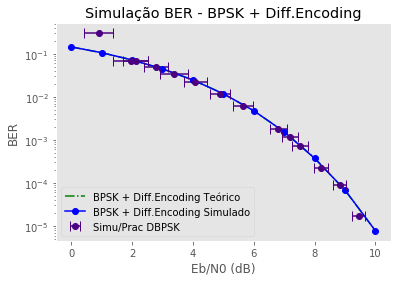

In [21]:
plt.style.use('ggplot')
plt.semilogy(EbN0_range, theory, "g-.", label = "BPSK + Diff.Encoding Teórico")
plt.semilogy(EbN0_range, simu, "b-o", label = "BPSK + Diff.Encoding Simulado")
plt.errorbar(snr_avgs, bers, xerr = snr_stds, fmt = "o", color = "indigo", capsize = 5, label = "Simu/Prac DBPSK")
plt.legend()
plt.grid()

plt.title('Simulação BER - BPSK + Diff.Encoding')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('BER')
plt.savefig("Curva.png")

In [ ]:
#####

In [ ]:
glob.glob("*.txt")

In [ ]:
dc = {}

In [ ]:
for file in glob.glob("*.txt"):
    mean, std = get_SNR(file)
    dc[file] = (get_SNR(file), get_BER(file.split(".")[0] + ".data"))
    print(file)
    #print(f"{file} (SNR Mean, SNR Std): {mean}, {std}")

In [ ]:
sorted(dc.items(), key = lambda x: x[1][0])

In [ ]:
lst_SNR = []
lst_BER = []

for x in sorted(dc.items(), key = lambda x: x[1][0]):
    print(f"{x[0]}:   SNR Mean, SNR Std: {x[1][0]}, BER: {x[1][1]}")
    lst_SNR.append(x[1][0][0])
    lst_BER.append(x[1][1])

In [ ]:
lst_BER

In [ ]:
lst_SNR